In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import random
import gc
import h5py

In [2]:
d = np.loadtxt('H_function_20_over.dat')

In [3]:
d

array([[  0.00000000e+00,   0.00000000e+00],
       [  1.00000000e-04,   3.10148000e-05],
       [  2.00000000e-04,   6.20362000e-05],
       ..., 
       [  5.89980000e+00,  -7.51049000e-05],
       [  5.89990000e+00,  -3.89075000e-05],
       [  5.90000000e+00,  -2.69321000e-06]])

In [23]:
H_function = np.zeros(int(d.size/2))
inverse_H_function = np.zeros(int(d.size/2))
time_index = np.zeros(int(d.size/2))


for i in range(int(d.size/2)):
    H_function[i] = d[i, 1]
    inverse_H_function[i] = d[int(d.size/2)-i-1, 1]
    time_index[i] = d[i, 0]

In [24]:
gamma_a = (H_function - inverse_H_function)/2.

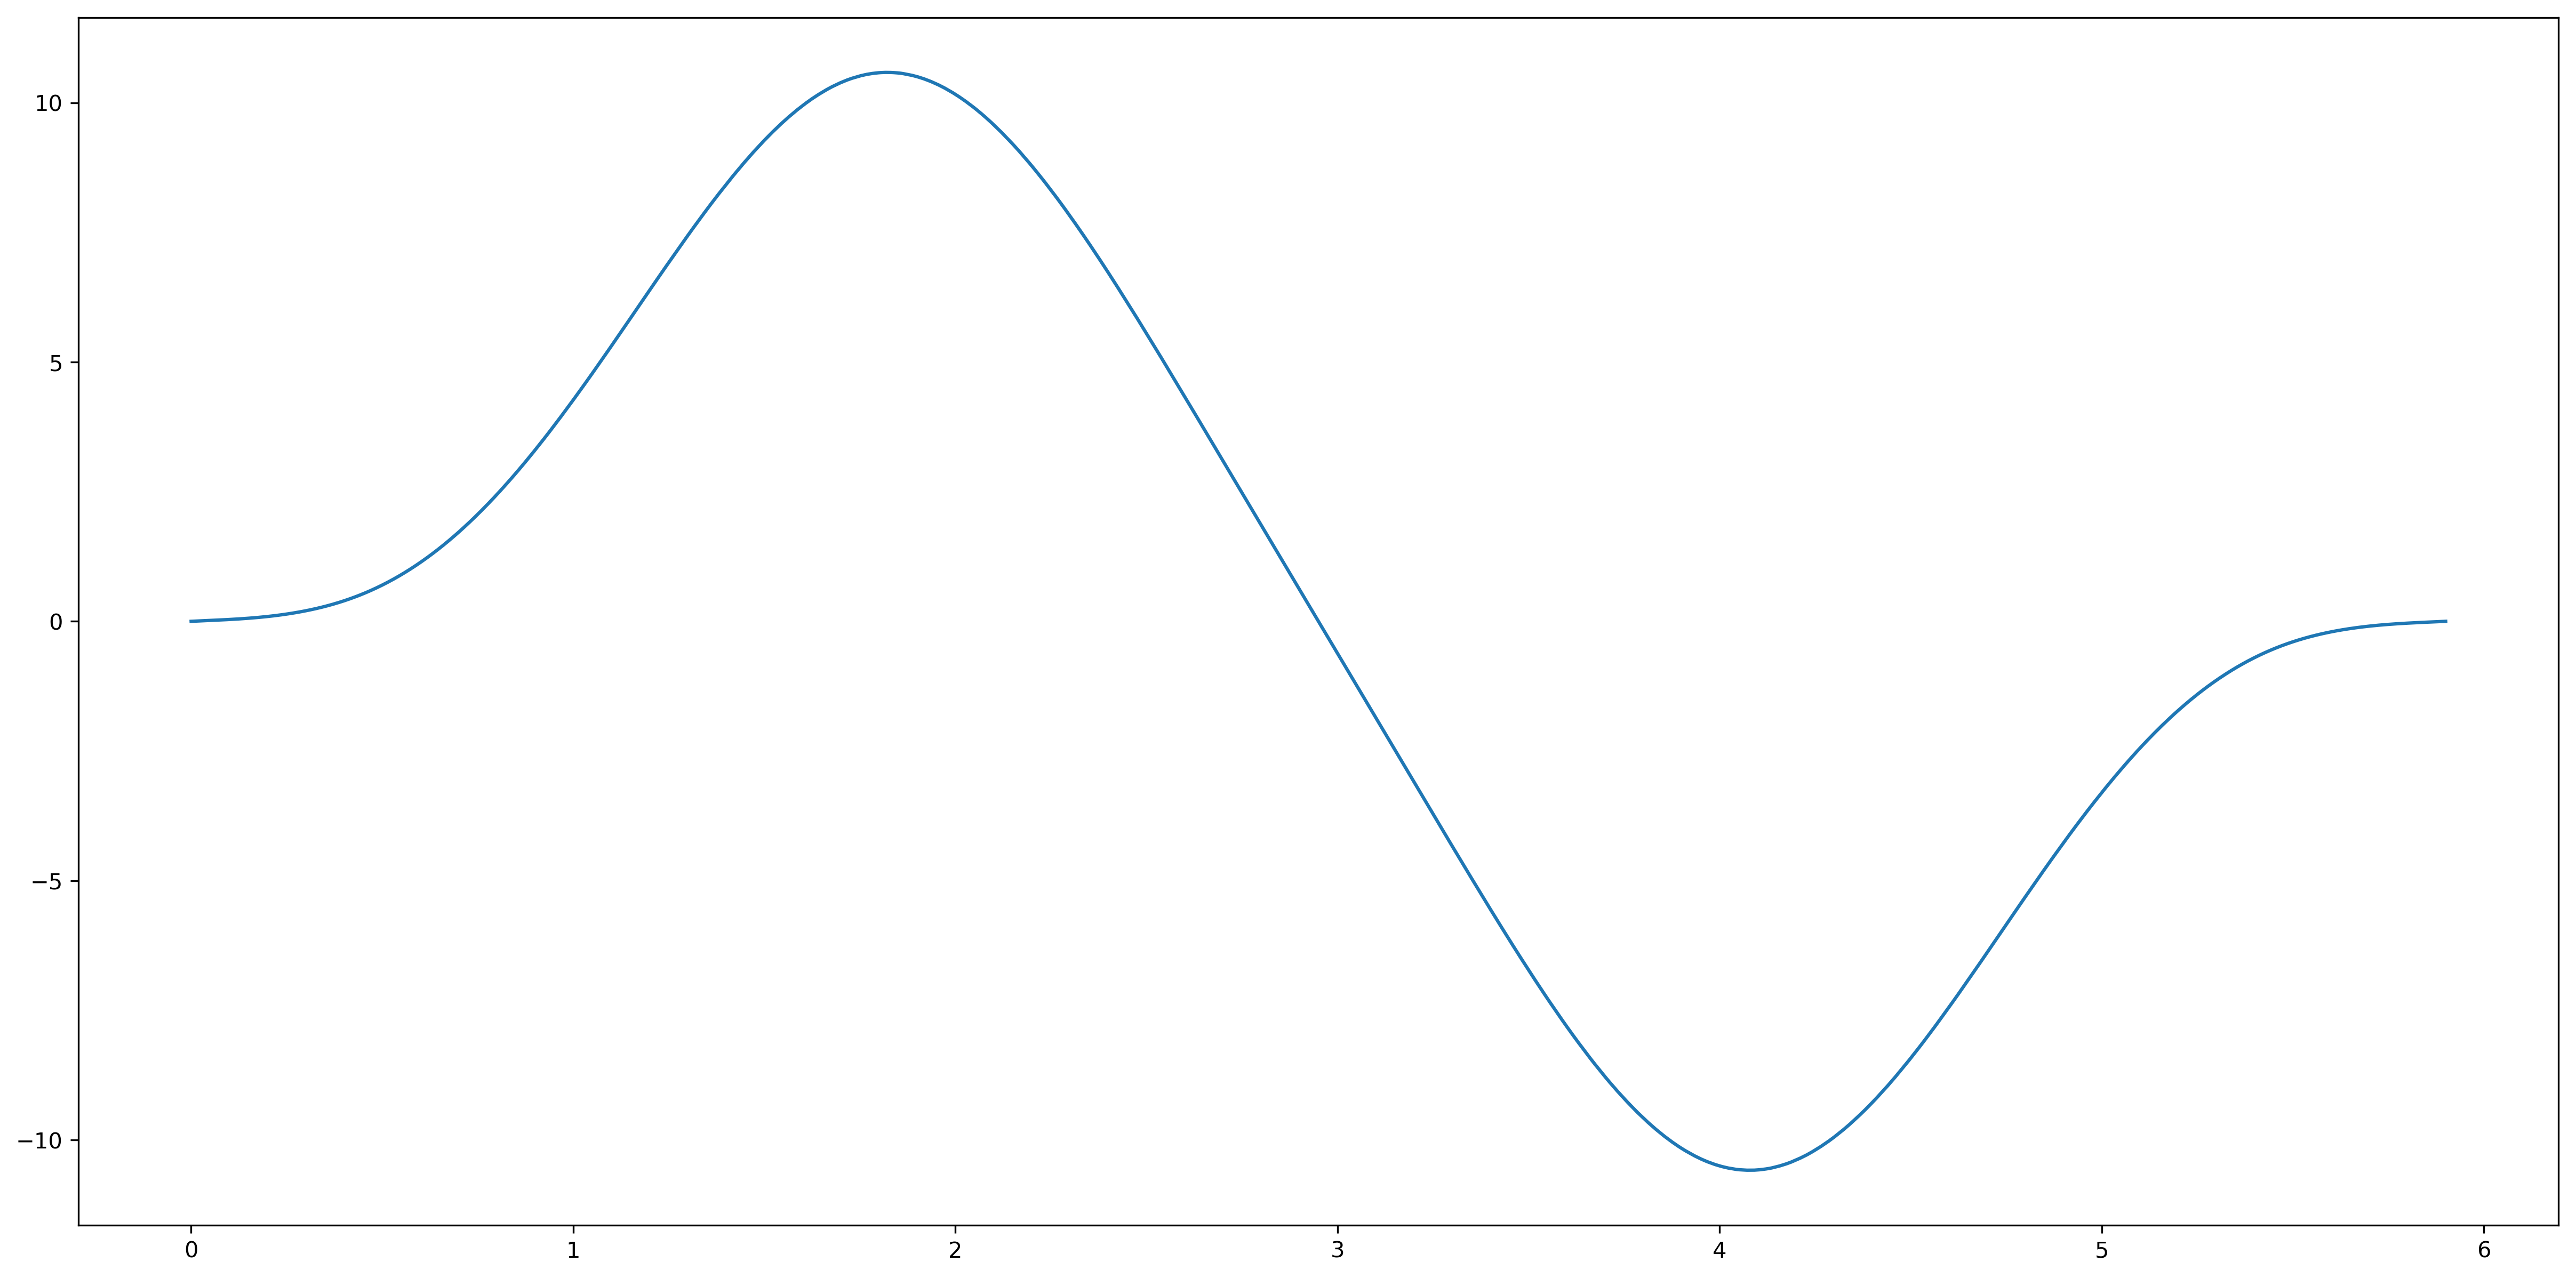

In [25]:
plt.clf()
fig = plt.figure(figsize=(20,10), dpi = 300)
plt.plot(time_index, gamma_a)
plt.show()

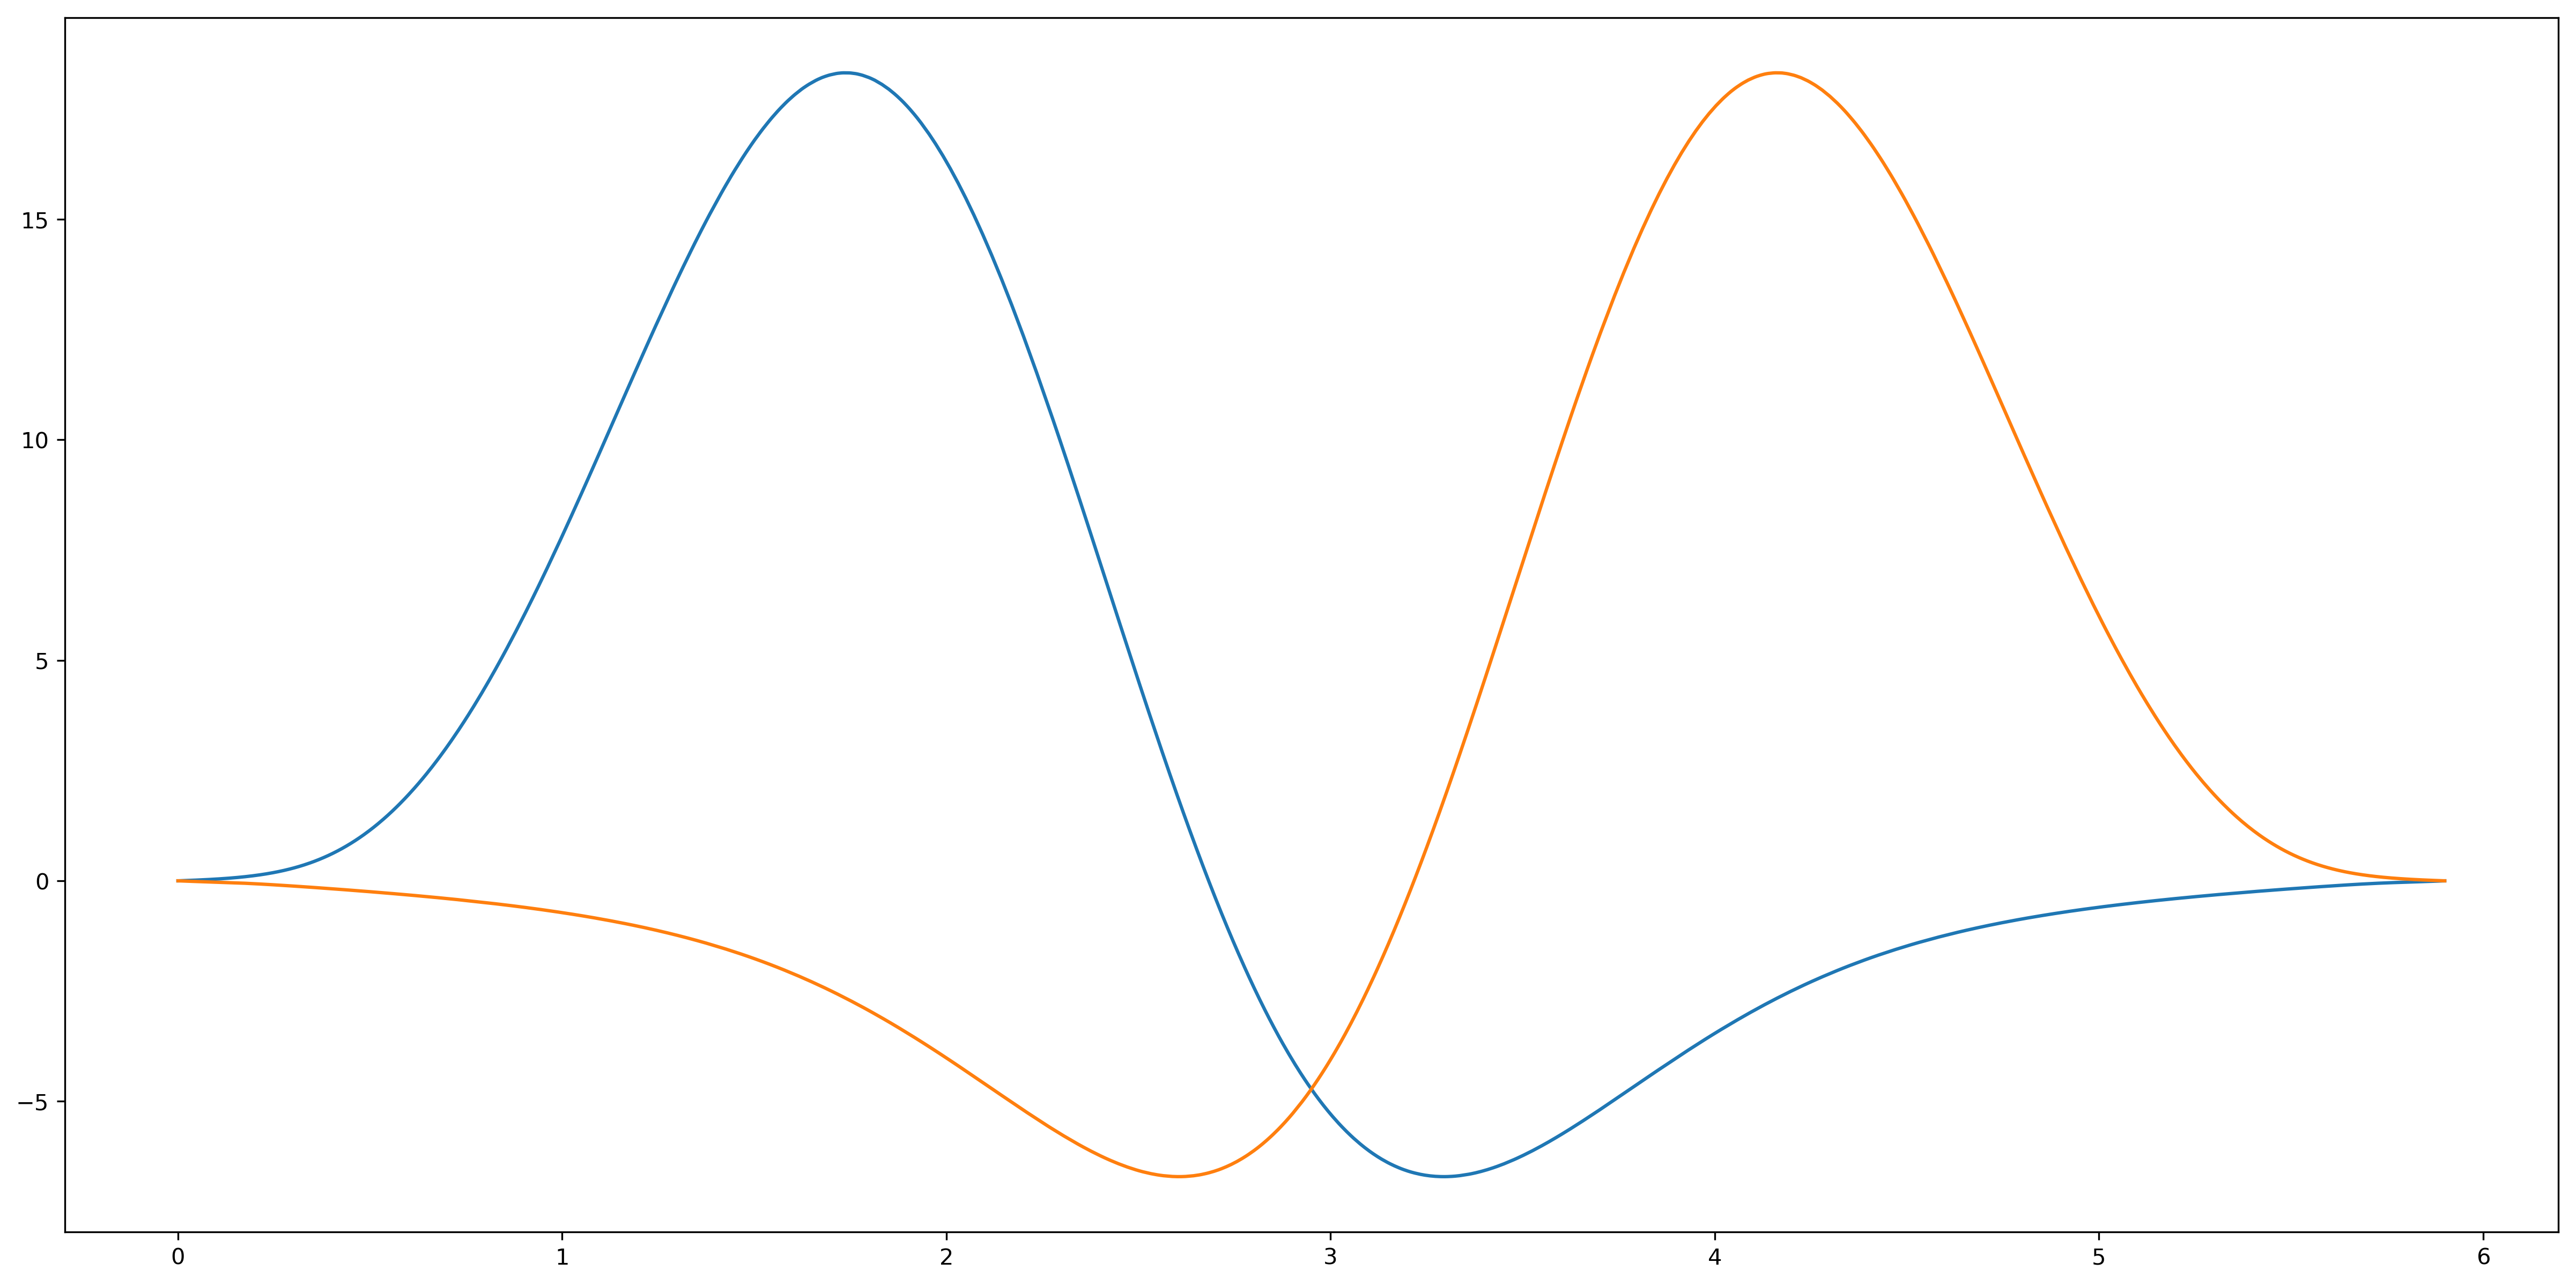

In [26]:
plt.clf()
fig = plt.figure(figsize=(20,10), dpi = 300)
plt.plot(time_index, H_function)
plt.plot(time_index, inverse_H_function)
plt.show()